In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np
import scipy as sp
import os

from skimage import img_as_float
from skimage.morphology import reconstruction, h_maxima, h_minima
from skimage import morphology

In [2]:
from scipy.ndimage import gaussian_filter
from skimage import data
from skimage import img_as_float
from skimage.morphology import reconstruction
import numpy as np
from skimage.morphology import h_maxima

In [2]:
# An Unsupervised Approach for Overlapping Cervical Cell Cytoplasm Segmentation

## 1) Cell clump segmentation
### - median filter (5 x 5)
### - adaptive histogram equalization
### - Cytoplasm: OTSU filtering
### - Nucleus: Global-Mean Threshold

## 2) Modified OTSU method with class prior probablility
### - OTSU and class prior probability (pixel * 0.05)

## 3) Cytoplasm segmentation
### - the distance regularized level set evolution

In [3]:
pathdir = '../images/LBC01/'
pathlist = [pathdir + p for p in os.listdir(pathdir)]
pathlist[0:5]

['../images/LBC01/LBC01-20210102(1)_228.png',
 '../images/LBC01/LBC01-20210102(1)_1771.png',
 '../images/LBC01/LBC01-20210102(1)_814.png',
 '../images/LBC01/LBC01-20210102(1)_378.png',
 '../images/LBC01/LBC01-20210102(1)_1268.png']

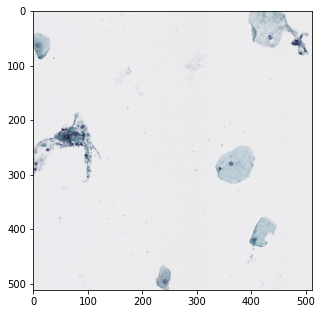

In [12]:
# img = cv2.imread("../../Dataset/papsmear/isbi2015/Training/frame014_stack/fov000.png")
NUMBER = 290
img = cv2.imread(pathlist[NUMBER])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, dsize=(512,512), interpolation=cv2.INTER_LINEAR)

plt.figure(figsize=(5, 10))
plt.imshow(img)

3


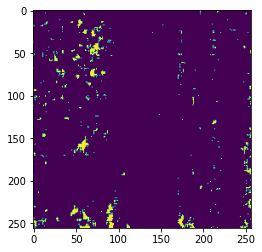

In [78]:
gridsize = 8
img = cv2.imread(pathlist[NUMBER])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
img = cv2.resize(img, dsize=(256,256), interpolation=cv2.INTER_LINEAR)
img = cv2.medianBlur(img, 5)

lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)

lab_planes = cv2.split(lab)
print(len(lab_planes))

clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(gridsize,gridsize))
lab_planes[0] = clahe.apply(lab_planes[0])

lab = cv2.merge(lab_planes)

rgb = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)
# rgb = h_maxima(rgb, 1)
b = rgb[:,:,2]
b = h_maxima(b, 3)
plt.imshow(b)

# plt.figure(figsize=(5, 10))
# plt.imshow(rgb)




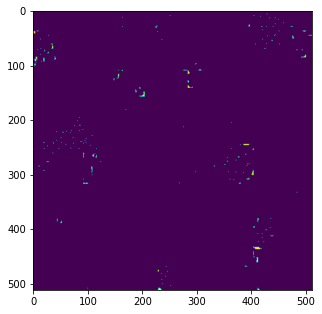

In [95]:
gridsize = 64
img = cv2.imread(pathlist[NUMBER])
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
img = cv2.resize(img, dsize=(512,512), interpolation=cv2.INTER_LINEAR)
img = cv2.medianBlur(img, 5)

clahe = cv2.createCLAHE(clipLimit=2.,tileGridSize=(gridsize,gridsize))
img = clahe.apply(img)


img = h_maxima(img, 10)

plt.figure(figsize=(5, 10))
plt.imshow(img)